First load the necessary libraries / modules.

In [2]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats  
import matplotlib.pyplot as plt
import pandas as pd
import io

Load the dataset into a dataframe.

In [3]:
url = "Data.csv"
df_init = pd.read_csv(url)
df_init.head() # Print the first five rows

,CouncillorId,CouncillorName,Party,Position,Canton,Region,Date_de_naissance,Age,Sexe,Voting_Object,Vote,Party_Vote,VoteAgainstParty
0,2513,Maillard Pierre-Yves,Socialists,Left,VD,swiss french,16/03/1968,54,M,01. Augmentation progressive des depenses de l...,No,No,0
1,2513,Maillard Pierre-Yves,Socialists,Left,VD,swiss french,16/03/1968,54,M,02. Transparence sur les cas de discours haine...,Yes,Yes,0
2,2513,Maillard Pierre-Yves,Socialists,Left,VD,swiss french,16/03/1968,54,M,03. Prevenir le gaspillage d'energie d? aux ap...,Yes,Yes,0
3,2513,Maillard Pierre-Yves,Socialists,Left,VD,swiss french,16/03/1968,54,M,04. Amelioration de la securite routiere gr?ce...,Yes,Yes,0
4,2513,Maillard Pierre-Yves,Socialists,Left,VD,swiss french,16/03/1968,54,M,05. Agir pour une plus grande neutralite des a...,Yes,Yes,0


## 1.1 Graphical Analyis

### 1.1.1 Pie chart

Pie charts are used to show proportions of a whole. In our case we choose to examine the representation of different social characteristics among councillors.

In order to analyse the councillor population, we need to create a separate dataset

In [4]:
df_Councillor = df_init[['CouncillorName','CouncillorName','Party','Position','Canton','Region','Age','Sexe']]
df_Councillor = df_Councillor.drop_duplicates()



Let's first look at the proportion of councillors from the different regions of switzerland

<AxesSubplot:>

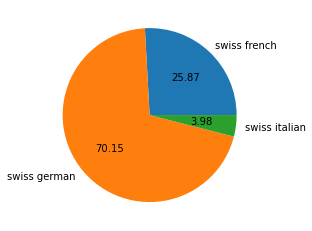

In [5]:
df_Councillor.groupby('Region').size().plot(kind='pie', autopct='%.2f' ,ylabel="")

Now let's look at the split of councillors between parties and political position.

<AxesSubplot:>

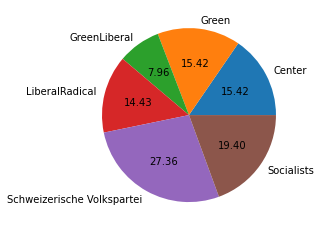

In [6]:
df_Councillor.groupby('Party').size().plot(kind='pie', autopct='%.2f' ,ylabel="")

<AxesSubplot:>

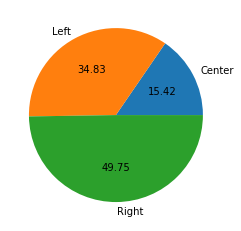

In [7]:
df_Councillor.groupby('Position').size().plot(kind='pie', autopct='%.2f' ,ylabel="")


Finally, let's look at the proportion of men and women in our dataset.

<AxesSubplot:>

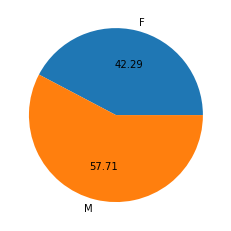

In [8]:
df_Councillor.groupby('Sexe').size().plot(kind='pie', autopct='%.2f' ,ylabel="")

### 1.1.2 Histogram

Histograms are used to display frequencies or proportions.

In our example, we are going to use an histogramm to take a closer look at the age distribution within the councillor population between men and women.

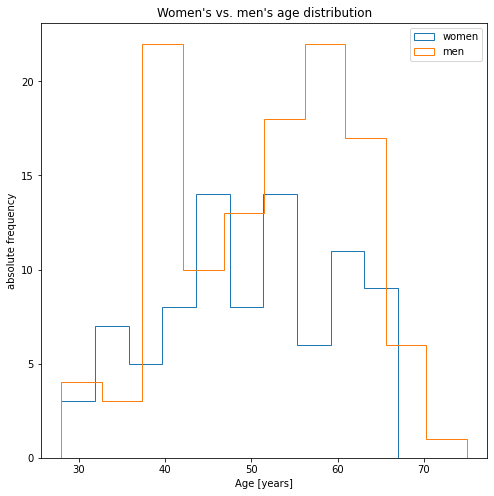

In [9]:
df_women = df_Councillor[df_Councillor['Sexe']=='F']
df_men = df_Councillor[df_Councillor['Sexe']=='M']

plt.figure(figsize=(8 ,8))
plt.subplot(1,1,1)
df_women['Age'].plot(kind="hist",fill=False,histtype='step',title="Women's vs. men's age distribution", label="women")
ax_s = df_men['Age'].plot(kind="hist",fill=False,histtype='step', label="men")
ax_s.set_xlabel('Age [years]')
ax_s.set_ylabel('absolute frequency')
plt.legend()

plt.show()

We can observe that if most men councillors are aged around 40 years and 60 years, women are more represented in the age 45 and 55 (it corresponds to an age where the children are older and they can spend more time on other activities) .


For each party, we will now take a closer look at the distribution of counselors by age for each party.

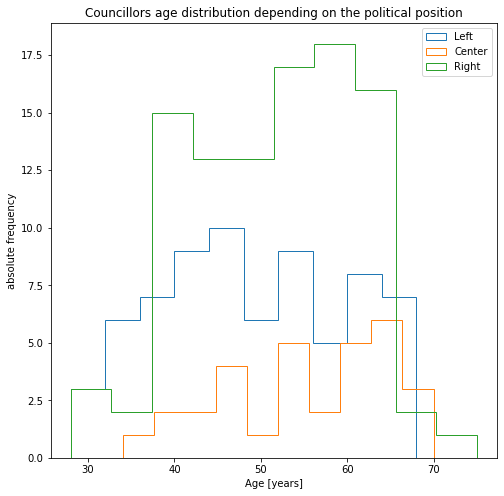

In [10]:
df_left = df_Councillor[df_Councillor['Position']=='Left']
df_center = df_Councillor[df_Councillor['Position']=='Center']
df_right = df_Councillor[df_Councillor['Position']=='Right']

plt.figure(figsize=(8 ,8))
plt.subplot(1,1,1)
df_left['Age'].plot(kind="hist",fill=False,histtype='step',title="Councillors age distribution depending on the political position", label="Left")
ax_s = df_center['Age'].plot(kind="hist",fill=False,histtype='step', label="Center")
ax_s = df_right['Age'].plot(kind="hist",fill=False,histtype='step', label="Right")
ax_s.set_xlabel('Age [years]')
ax_s.set_ylabel('absolute frequency')
plt.legend()

plt.show()

Young people are more attracted to the Left, while when they reach the age of 40, most councillors are more attracted to the right. We observe a shift from the left to the center and the right as the age grows.

Let's now take a closer look at the number of votes against the Party, depending on the Age of the counsillors.

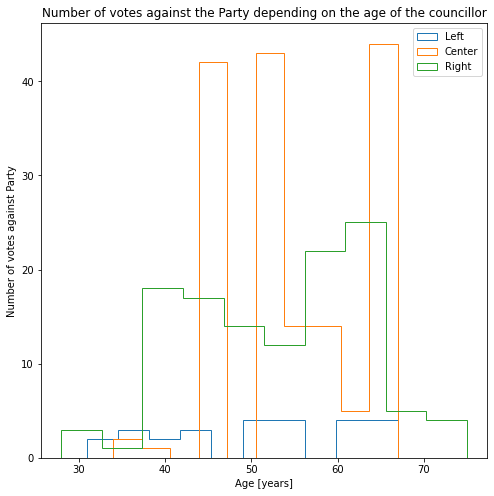

In [11]:
df = df_init[df_init['VoteAgainstParty']==1]
df = df[['CouncillorName','CouncillorName','Party','Position','Canton','Region','Age','Sexe']]


df_left = df[df['Position']=='Left']
df_center = df[df['Position']=='Center']
df_right = df[df['Position']=='Right']

plt.figure(figsize=(8 ,8))
plt.subplot(1,1,1)
df_left['Age'].plot(kind="hist",fill=False,histtype='step',title="Number of votes against the Party depending on the age of the councillor", label="Left")
ax_s = df_center['Age'].plot(kind="hist",fill=False,histtype='step', label="Center")
ax_s = df_right['Age'].plot(kind="hist",fill=False,histtype='step', label="Right")
ax_s.set_xlabel('Age [years]')
ax_s.set_ylabel('Number of votes against Party')
plt.legend()

plt.show()

We see clearly that the most people voting against the Party come from the center. This makes sense as they tend to have less extreme views in politics, they are also more likely to change their point of view depending on the subject. We can also observe that the level of disagreement with one party's ideas tends to increase as the age of the councillor increase.

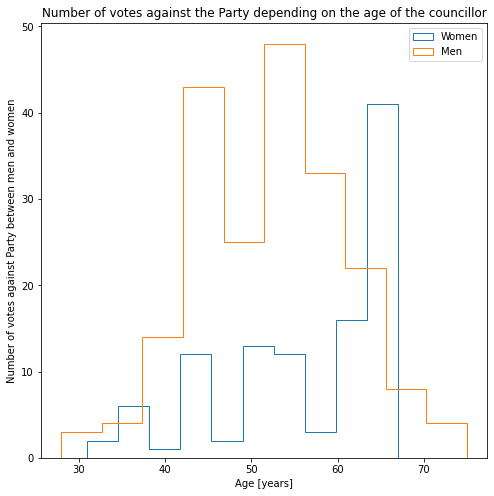

In [12]:
df = df_init[df_init['VoteAgainstParty']==1]
df = df[['CouncillorName','CouncillorName','Party','Position','Canton','Region','Age','Sexe']]


df_female = df[df['Sexe']=='F']
df_male = df[df['Sexe']=='M']

plt.figure(figsize=(8 ,8))
plt.subplot(1,1,1)
df_female['Age'].plot(kind="hist",fill=False,histtype='step',title="Number of votes against the Party depending on the age of the councillor", label="Women")
ax_s = df_male['Age'].plot(kind="hist",fill=False,histtype='step', label="Men")
ax_s.set_xlabel('Age [years]')
ax_s.set_ylabel('Number of votes against Party between men and women')
plt.legend()

plt.show()

We can clearly see that men tend to disagree more with their party than women. Moreover, the older people disagree more with their party.

### 1.1.3 Scatter plots

We now look at the different partys and how they are composed in terms of the age of their counsillors.

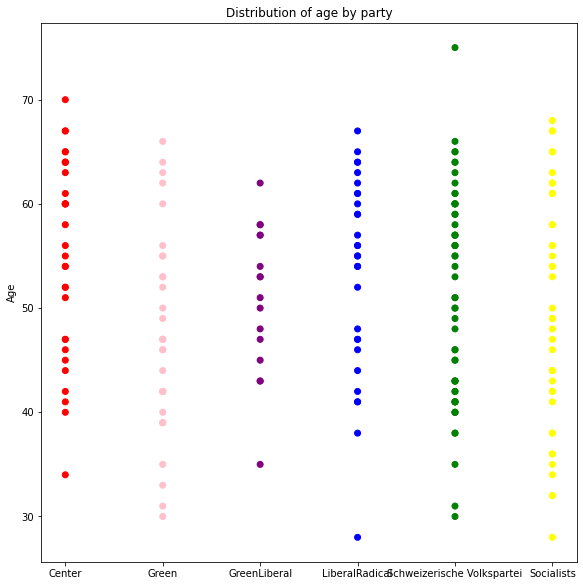

In [13]:
#sort the dataframe by Party and reindex the dataframe
df = df_Councillor.sort_values(by='Party')
df = df.reset_index(drop=True)
#print(df)
df['Party'].unique()
group = df.groupby('Party')
#print(group.count())

color=np.repeat(np.array(['red', 'pink', 'purple','blue','green','yellow']), [31,31,16,29,55,39], axis=0)
df1=pd.DataFrame(dict(col=color))
#print(df1)
df2=pd.concat([df, df1], axis=1)

#print(df2)
plt.figure(figsize=(16 ,16))

plt.subplot(2,2,1)
plt.scatter(df2['Party'], df2['Age'], c=df2['col'])
plt.title('Distribution of age by party')
plt.ylabel('Age')

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

Let's do the same thing and focus now more on the repartition of age within the different political positions (left/center/right)

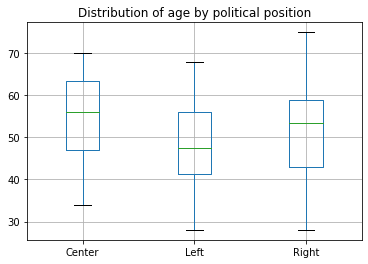

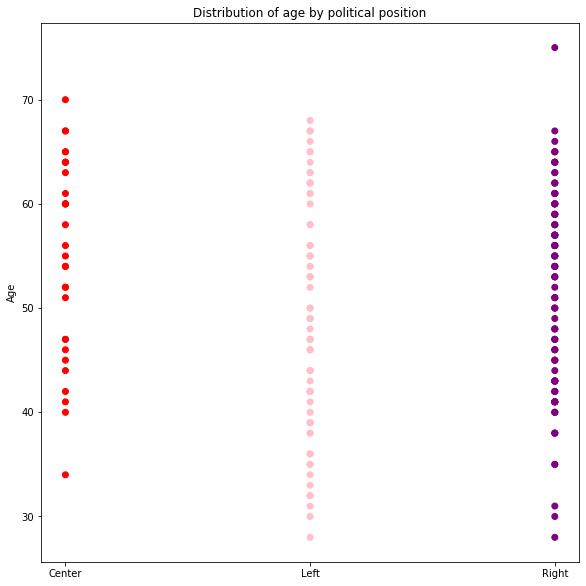

In [14]:
#sort the dataframe by Party and reindex the dataframe
df = df_Councillor.sort_values(by='Position')
df = df.reset_index(drop=True)
#print(df)
df['Position'].unique()
group = df.groupby('Position')
#print(group.count())

df=df[['Age', 'Position']]
fig, ax = plt.subplots(1,1)
df.pivot(columns='Position', values='Age').boxplot()
ax.set_title('Distribution of age by political position')

color=np.repeat(np.array(['red', 'pink', 'purple']), [31,70,100], axis=0)
df1=pd.DataFrame(dict(col=color))
#print(df1)
df2=pd.concat([df, df1], axis=1)

#print(df2)
plt.figure(figsize=(16 ,16))

plt.subplot(2,2,1)
plt.scatter(df2['Position'], df2['Age'], c=df2['col'])
plt.title('Distribution of age by political position')
plt.ylabel('Age')

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

We observe that younger people tend to go mostly for the "extremes" (left or right), while older people choose the center.

Lets now look at the age distribution of people who vote against their party :

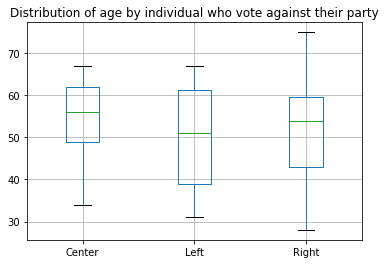

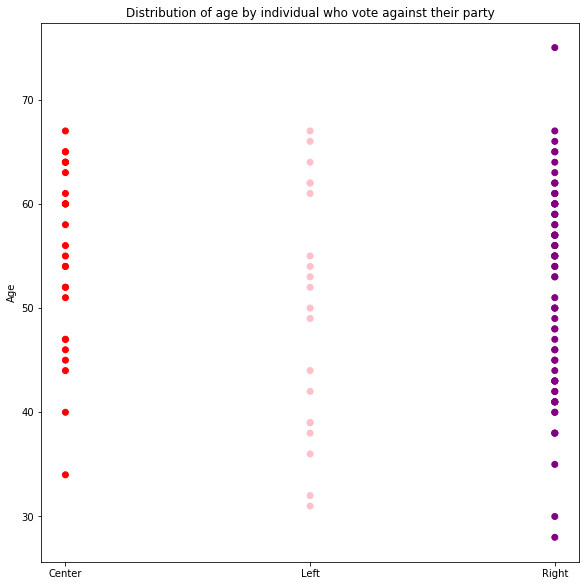

In [15]:
df = df_init[df_init['VoteAgainstParty']==1]
df = df[['CouncillorName','CouncillorName','Party','Position','Canton','Region','Age','Sexe']]
df = df.drop_duplicates()

df=df[['Age', 'Position']]
fig, ax = plt.subplots(1,1)
df.pivot(columns='Position', values='Age').boxplot()
ax.set_title('Distribution of age by individual who vote against their party')

#sort the dataframe by Party and reindex the dataframe
df = df.sort_values(by='Position')
df = df.reset_index(drop=True)
#print(df)
df['Position'].unique()
group = df.groupby('Position')
#print(group.count())

color=np.repeat(np.array(['red', 'pink', 'purple']), [27,20,71],axis = 0) 
df1=pd.DataFrame(dict(col=color))
#print(df1)
df2=pd.concat([df, df1], axis=1)

#print(df2)
plt.figure(figsize=(16 ,16))

plt.subplot(2,2,1)
plt.scatter(df2['Position'], df2['Age'], c=df2['col'])
plt.title('Distribution of age by individual who vote against their party')
plt.ylabel('Age')

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

Based on these graphs, we can make two hypothesis, which we can test:
    
    1. Older people tend to vote more against their party as younger people (as they have more experience and are more confident about their opinions)
    
    2. People from the center tend to vote more against their party as they have different opinions depending on the subject (thes have less extreme viewpoints and are thus more encline to have different opinions in a same party)